In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('real_clean.csv')

# Alle Spalten anzeigen, die nur NaN-Werte enthalten
nan_columns = df.columns[df.isna().all()].tolist()
print(f"Spalten mit nur NaN-Werten: {nan_columns}")

# Spalten, die entfernt werden sollen
columns_to_remove = [
    'DailyAverageDryBulbTemperature', 'DailyAverageStationPressure', 'DailyAverageWindSpeed',
    'DailyCoolingDegreeDays', 'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
    'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection', 'DailyPeakWindSpeed',
    'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection',
    'DailySustainedWindSpeed', 'DailyWeather', 'STATION', 'HourlyPrecipitation', 'HourlyPresentWeatherType',
    'HourlySkyConditions', 'HourlyStationPressure', 'HourlyWetBulbTemperature'
]

# Entfernen der Spalten mit nur NaN-Werten und der angegebenen Spalten
df_cleaned = df.drop(columns=nan_columns + columns_to_remove, errors='ignore')

# Bereinigte DataFrame als CSV speichern
df_cleaned.to_csv('Boulder_Weather.csv', index=False)


/tmp/ipykernel_1632/984846401.py:1: DtypeWarning: Columns (21,27,29,30,31,32,33,34,37,38,42,43,44,51,53,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('real_clean.csv')


Spalten mit nur NaN-Werten: ['AWND', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit', 'BackupElements', 'BackupElevation', 'BackupElevationUnit', 'BackupEquipment', 'BackupLatitude', 'BackupLongitude', 'BackupName', 'CDSD', 'CLDD', 'DSNW', 'DYHF', 'DYTS', 'DailyAverageDewPointTemperature', 'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure', 'DailyAverageWetBulbTemperature', 'DailyDepartureFromNormalAverageTemperature', 'HDSD', 'HTDD', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlySeaLevelPressure', 'MonthlyAverageRH', 'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip', 'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp', 'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp', 'MonthlyDepartureFromNormalAverageTemperature', 'MonthlyDepartureFromNormalCoolingDegreeDays', 'MonthlyDepartureFromNormalHeatingDegreeDays', 'MonthlyDepartureFromNormalMaximumTemperature', 'MonthlyDepartureFromNormalMinimumTemperature', 'MonthlyDepartureFromNormalPrecipitati

In [27]:
weather = pd.read_csv("Boulder_Weather.csv")
# Entferne die Spalte 'WindEquipmentChangeDate', falls sie im DataFrame enthalten ist
weather = weather.drop(columns=['WindEquipmentChangeDate;'], errors='ignore')

# Konvertiere die Datentypen der Spalten
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['HourlyAltimeterSetting'] = pd.to_numeric(weather['HourlyAltimeterSetting'], errors='coerce')
weather['HourlyDewPointTemperature'] = pd.to_numeric(weather['HourlyDewPointTemperature'], errors='coerce')
weather['HourlyDryBulbTemperature'] = pd.to_numeric(weather['HourlyDryBulbTemperature'], errors='coerce')
weather['HourlyRelativeHumidity'] = pd.to_numeric(weather['HourlyRelativeHumidity'], errors='coerce')
weather['HourlyVisibility'] = pd.to_numeric(weather['HourlyVisibility'], errors='coerce')
weather['HourlyWindDirection'] = pd.to_numeric(weather['HourlyWindDirection'], errors='coerce')
weather['HourlyWindGustSpeed'] = pd.to_numeric(weather['HourlyWindGustSpeed'], errors='coerce')
weather['HourlyWindSpeed'] = pd.to_numeric(weather['HourlyWindSpeed'], errors='coerce')
weather['REM'] = weather['REM'].astype(str)
weather['REPORT_TYPE.1'] = weather['REPORT_TYPE.1'].astype(str)
weather['SOURCE.1'] = weather['SOURCE.1'].astype(str)

# Konvertiere die 'Sunrise' und 'Sunset' Spalten in numerische Werte
weather['Sunrise'] = pd.to_numeric(weather['Sunrise'], errors='coerce')
weather['Sunset'] = pd.to_numeric(weather['Sunset'], errors='coerce')

weather.info()

/tmp/ipykernel_1632/3999221091.py:1: DtypeWarning: Columns (3,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("Boulder_Weather.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206488 entries, 0 to 206487
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   DATE                       206488 non-null  datetime64[ns]
 1   REPORT_TYPE                206488 non-null  object        
 2   SOURCE                     206488 non-null  object        
 3   HourlyAltimeterSetting     204420 non-null  float64       
 4   HourlyDewPointTemperature  203640 non-null  float64       
 5   HourlyDryBulbTemperature   203850 non-null  float64       
 6   HourlyRelativeHumidity     203997 non-null  float64       
 7   HourlyVisibility           203615 non-null  float64       
 8   HourlyWindDirection        202599 non-null  float64       
 9   HourlyWindGustSpeed        21322 non-null   float64       
 10  HourlyWindSpeed            204411 non-null  float64       
 11  REM                        206488 non-null  object  

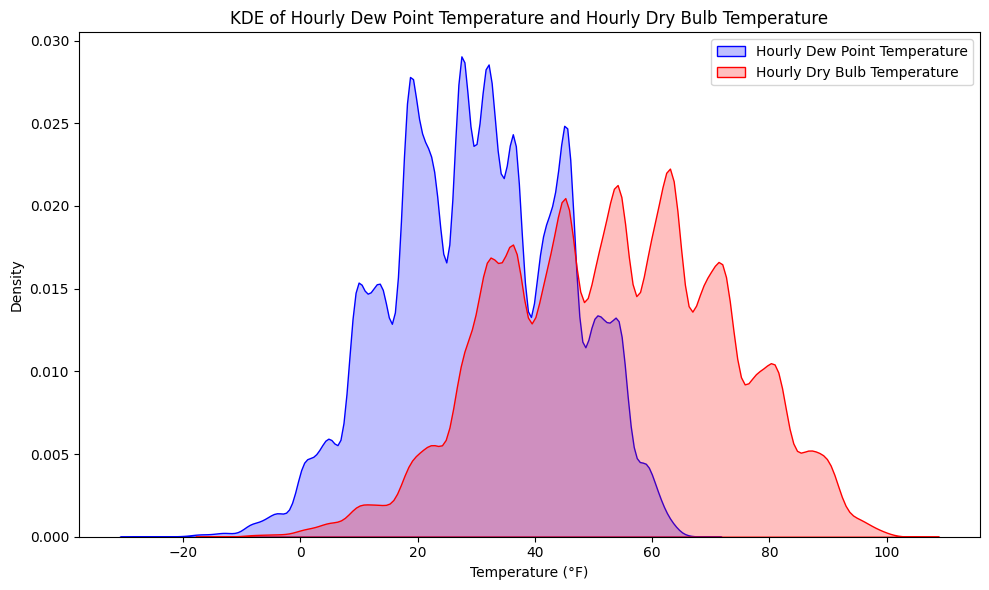

In [28]:
import seaborn as sns

# CSV-Datei einlesen
df = weather

df['DATE'] = pd.to_datetime(df['DATE'])

# Entfernen von Zeilen mit NaN-Werten in den relevanten Spalten
df_clean = df.dropna(subset=['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'])

# Die relevanten Spalten auswählen
df_plot = df_clean[['DATE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature']]

# Einen KDE-Plot erstellen
plt.figure(figsize=(10, 6))

# KDE für HourlyDewPointTemperature
sns.kdeplot(df_plot['HourlyDewPointTemperature'], label='Hourly Dew Point Temperature', color='blue', fill=True)

# KDE für HourlyDryBulbTemperature
sns.kdeplot(df_plot['HourlyDryBulbTemperature'], label='Hourly Dry Bulb Temperature', color='red', fill=True)

# Labels und Titel hinzufügen
plt.xlabel('Temperature (°F)')
plt.ylabel('Density')
plt.title('KDE of Hourly Dew Point Temperature and Hourly Dry Bulb Temperature')

# Legende anzeigen
plt.legend()

# Zeigen des Plots
plt.tight_layout()
plt.show()


In [31]:
weather["HourlyVisibility"].unique()

array([10.  ,  7.  ,  2.5 ,  2.  ,  5.  ,   nan,  4.  ,  3.  ,  1.75,
        0.75,  0.5 ,  1.  ,  1.25,  1.5 ,  0.25, 20.  ,  0.  ])

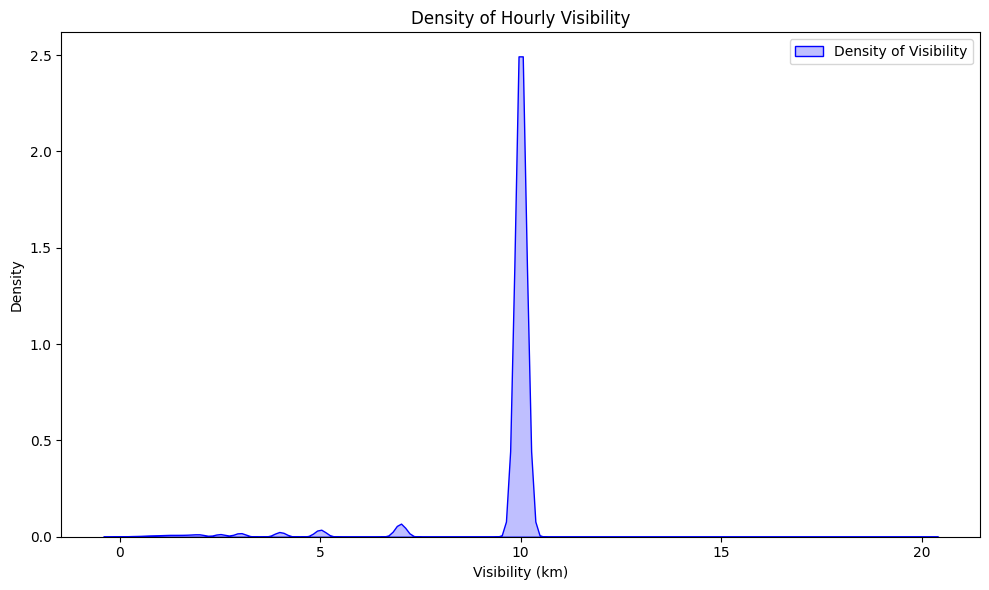

/tmp/ipykernel_1632/2784122334.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_clean['SmoothedVisibility'] = weather_clean['HourlyVisibility'].rolling(window=10, min_periods=1).mean()


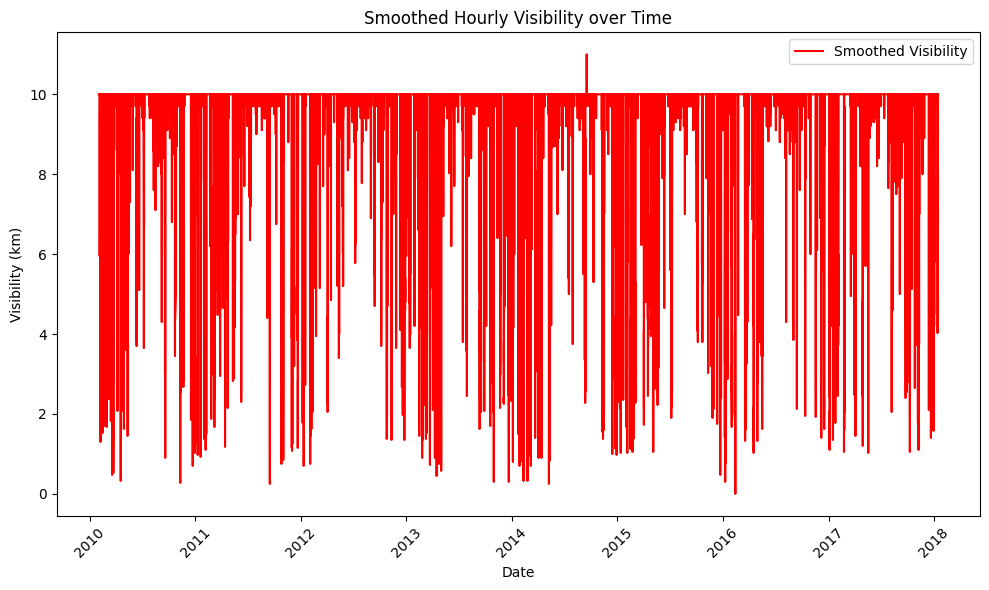

In [30]:
# Entfernen von Zeilen mit NaN-Werten in der Spalte 'HourlyVisibility'
weather_clean = weather.dropna(subset=['HourlyVisibility'])

# Dichte der Sichtweite (KDE-Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(weather_clean['HourlyVisibility'], fill=True, color='blue', label='Density of Visibility')
plt.xlabel('Visibility (km)')
plt.ylabel('Density')
plt.title('Density of Hourly Visibility')
plt.legend()
plt.tight_layout()
plt.show()

# Zeitlicher Verlauf der Sichtweite geglättet mit gleitendem Durchschnitt
# Zuerst einen gleitenden Durchschnitt über z.B. 10 Stunden berechnen
weather_clean['SmoothedVisibility'] = weather_clean['HourlyVisibility'].rolling(window=10, min_periods=1).mean()

# Plot für den geglätteten Verlauf der Sichtweite
plt.figure(figsize=(10, 6))
plt.plot(weather_clean['DATE'], weather_clean['SmoothedVisibility'], color='red', label='Smoothed Visibility')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.title('Smoothed Hourly Visibility over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()